# Initial Preparation

## Import Packages

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from textblob import TextBlob
#from pandas_profiling import ProfileReport

## Import Data

In [2]:
url = "../data/raw/twitter_training.csv"

df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [3]:
len(df)

74682

## Subset Data

In [4]:
df = df.sample(frac=0.01)

## Visualise and Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 69201 to 57014
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       747 non-null    int64 
 1   Entity         747 non-null    object
 2   Sentiment      747 non-null    object
 3   Tweet_Content  737 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.2+ KB


In [6]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
69201,3853,Cyberpunk2077,Negative,"oh good, we get a couple extra weeks in the la..."
41972,10001,PlayerUnknownsBattlegrounds(PUBG),Negative,"As for the government, it banned these data se..."
70348,10852,TomClancysGhostRecon,Negative,@XboxSupport Hey guys. I had Tom Clancy ’ s Gh...
9294,9598,Overwatch,Positive,Honestly I played Zenyatta the other night in ...
28883,568,ApexLegends,Neutral,@PlayApex you got a penalty when this new rank...


In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Clean Data

<BarContainer object of 4 artists>

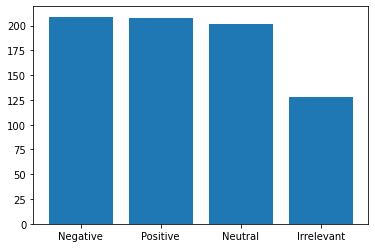

In [8]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [9]:
df = df.dropna()

# Further Exploration

In [10]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype=object)

In [11]:
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['Cyberpunk2077' 'PlayerUnknownsBattlegrounds(PUBG)'
 'TomClancysGhostRecon' 'Overwatch' 'ApexLegends' 'Google' 'Dota2'
 'HomeDepot' 'CallOfDutyBlackopsColdWar' 'PlayStation5(PS5)' 'CallOfDuty'
 'Facebook' 'TomClancysRainbowSix' 'GrandTheftAuto(GTA)' 'AssassinsCreed'
 'RedDeadRedemption(RDR)' 'NBA2K' 'CS-GO' 'FIFA' 'Borderlands'
 'Hearthstone' 'Xbox(Xseries)' 'johnson&johnson' 'Amazon' 'Fortnite'
 'Battlefield' 'LeagueOfLegends' 'Nvidia' 'WorldOfCraft' 'Verizon'
 'MaddenNFL' 'Microsoft']
32


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
69201,3853,Cyberpunk2077,Negative,"oh good, we get a couple extra weeks in the la...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41972,10001,PlayerUnknownsBattlegrounds(PUBG),Negative,"As for the government, it banned these data se...",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
70348,10852,TomClancysGhostRecon,Negative,@XboxSupport Hey guys. I had Tom Clancy ’ s Gh...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9294,9598,Overwatch,Positive,Honestly I played Zenyatta the other night in ...,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28883,568,ApexLegends,Neutral,@PlayApex you got a penalty when this new rank...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 4 artists>

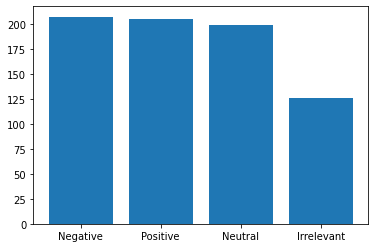

In [12]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

## Adding Features with TextBlob Pre-trained NLP

In [13]:
#Adding dimensions with textblob
tb_polarity = []
tb_subject = []


for tweet in df["Tweet_Content"]:
    tb_polarity.append(TextBlob(tweet).sentiment[0])
    tb_subject.append(TextBlob(tweet).sentiment[1])
    
    
df["Polarity"] = tb_polarity
df["Subjectivity"] = tb_subject

## Stop Word Removal and Lemmatization With NLTK

In [14]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')


def remove_stopwords(ls):
    #Removes stop words and lemmatises
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopwords.words()) and (word.isalpha())]
    
    ls = " ".join(ls)
    return ls

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

lemmatiser = WordNetLemmatizer()

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

In [15]:
#Display an example of the new text
list(df["Tweet_Content_Split"])[0]

'oh good get couple extra week lab wit fun cyberpunk opinion possible'

In [16]:
#View the dataframe after this editing
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Polarity,Subjectivity,Tweet_Content_Split
69201,3853,Cyberpunk2077,Negative,"oh good, we get a couple extra weeks in the la...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.300000,0.480000,oh good get couple extra week lab wit fun cybe...
41972,10001,PlayerUnknownsBattlegrounds(PUBG),Negative,"As for the government, it banned these data se...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.050000,0.300000,As government banned data security apps really...
70348,10852,TomClancysGhostRecon,Negative,@XboxSupport Hey guys. I had Tom Clancy ’ s Gh...,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.070000,0.458889,XboxSupport Hey guy I Tom Clancy Ghost recon w...
9294,9598,Overwatch,Positive,Honestly I played Zenyatta the other night in ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.318750,0.493750,Honestly I played Zenyatta night comp overwatc...
28883,568,ApexLegends,Neutral,@PlayApex you got a penalty when this new rank...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.131818,0.427273,PlayApex got penalty new ranked ended daughter...


## Tokenisation

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokeniser = Tokenizer(num_words=1000, lower=True)

tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [19]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["Tweet_Content_Split"]))

## Final Preparation of Data for Model

In [20]:
y = df["Sentiment"]

labels = set(df["Sentiment"])

class_to_index = {"Neutral":0, "Irrelevant":0, "Negative":1, "Positive": 2}

index_to_class = dict((v,k) for k, v in class_to_index.items())

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in df["Sentiment"]])

ids_to_names = lambda y: np.array([index_to_class.get(x) for x in y])

train_labels = names_to_ids(y)

In [21]:
df["Labels"] = train_labels

In [22]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Polarity,Subjectivity,Tweet_Content_Split,Labels
69201,3853,Cyberpunk2077,Negative,"oh good, we get a couple extra weeks in the la...",0,0,0,0,0,0,...,0,0,0,0,0,0,0.300000,0.480000,oh good get couple extra week lab wit fun cybe...,1
41972,10001,PlayerUnknownsBattlegrounds(PUBG),Negative,"As for the government, it banned these data se...",0,0,0,0,0,0,...,0,0,0,0,0,0,0.050000,0.300000,As government banned data security apps really...,1
70348,10852,TomClancysGhostRecon,Negative,@XboxSupport Hey guys. I had Tom Clancy ’ s Gh...,0,0,0,0,0,0,...,1,0,0,0,0,0,-0.070000,0.458889,XboxSupport Hey guy I Tom Clancy Ghost recon w...,1
9294,9598,Overwatch,Positive,Honestly I played Zenyatta the other night in ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0.318750,0.493750,Honestly I played Zenyatta night comp overwatc...,2
28883,568,ApexLegends,Neutral,@PlayApex you got a penalty when this new rank...,0,1,0,0,0,0,...,0,0,0,0,0,0,-0.131818,0.427273,PlayApex got penalty new ranked ended daughter...,0


## Test/Train Split of Data

In [23]:
y = df["Labels"]

df2 = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split", "Labels"], axis=1)

In [24]:
#THIS DOESN'T WORK!! - I lose some of the features I think.

array_3 = df2.to_numpy()

full_array = np.concatenate([array_3, tweet_tokens], axis=1)

In [25]:
full_df = pd.DataFrame(full_array)

full_df.shape

(737, 1034)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(full_df, y, test_size=0.2, random_state=1)

## Build Neural Network with Keras

In [27]:
#Test initial network
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=1034),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='relu')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

## Testing Methods

In [66]:
#full_df.iloc[1]

for entry in full_df.iloc[1]:
    print(entry)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.3
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

### Neural Network with Keras

In [28]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=30,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/30
 1/19 [>.............................] - ETA: 1:46 - loss: 3.7973 - accuracy: 0.3125

InvalidArgumentError:  indices[3,32] = -1 is not in [0, 1000)
	 [[node sequential/embedding/embedding_lookup (defined at <ipython-input-28-c3ed78ffabb1>:5) ]] [Op:__inference_train_function_10624]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/embedding/embedding_lookup:
 sequential/embedding/embedding_lookup/6428 (defined at C:\Users\Cameron\Anaconda3\lib\contextlib.py:81)

Function call stack:
train_function


In [27]:
y_pred = model.predict(X_train)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)

In [28]:
set(y_pred_labels)

{'Irrelevant'}

# Final

## Training With Full Dataset

In [29]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=1034),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [30]:
h = model.fit(
     full_df, y,
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/20
24/24 [==============================] - 15s 428ms/step - loss: 1.2767 - accuracy: 0.3526
Epoch 2/20
24/24 [==============================] - 12s 512ms/step - loss: 1.0981 - accuracy: 0.4266
Epoch 3/20
24/24 [==============================] - 11s 451ms/step - loss: 1.0950 - accuracy: 0.4266
Epoch 4/20
24/24 [==============================] - 11s 453ms/step - loss: 1.0830 - accuracy: 0.4266
Epoch 5/20
24/24 [==============================] - 10s 404ms/step - loss: 1.0810 - accuracy: 0.4266
Epoch 6/20
24/24 [==============================] - 11s 446ms/step - loss: 1.0807 - accuracy: 0.4266


## Generating Predictions

## Download and Transform Test Data

In [31]:
path = "../data/raw/twitter_validation.csv"

test_df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

test_df = test_df.dropna()

In [32]:
onehot = pd.get_dummies(test_df["Entity"])

test_df = test_df.join(onehot)

test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Adding dimensions with textblob
tb_polarity = []
tb_subject = []


for tweet in test_df["Tweet_Content"]:
    tb_polarity.append(TextBlob(tweet).sentiment[0])
    tb_subject.append(TextBlob(tweet).sentiment[1])
    
    
test_df["Polarity"] = tb_polarity
test_df["Subjectivity"] = tb_subject

In [33]:
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)
test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [34]:
test_tweet_tokens = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))

In [35]:
y = test_df["Sentiment"]

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in test_df["Sentiment"]])

test_labels = names_to_ids(y)

In [36]:
test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,I mentioned Facebook I struggling motivation g...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BBC News Amazon bos Jeff Bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Microsoft Why I pay WORD function poorly Samsu...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,CSGO matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Now President slapping Americans really commit...


In [37]:
y = test_labels

test_df2 = test_df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split"], axis=1)

In [38]:
model.evaluate(test_df2, y)

32/32 [==============================] - 1s 8ms/step - loss: 1.0730 - accuracy: 0.4570


[1.0729602575302124, 0.4569999873638153]

## Generate Predictions

In [39]:
y_pred = model.predict(X_test)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)

In [42]:
set(y_pred_labels)

{'Negative'}